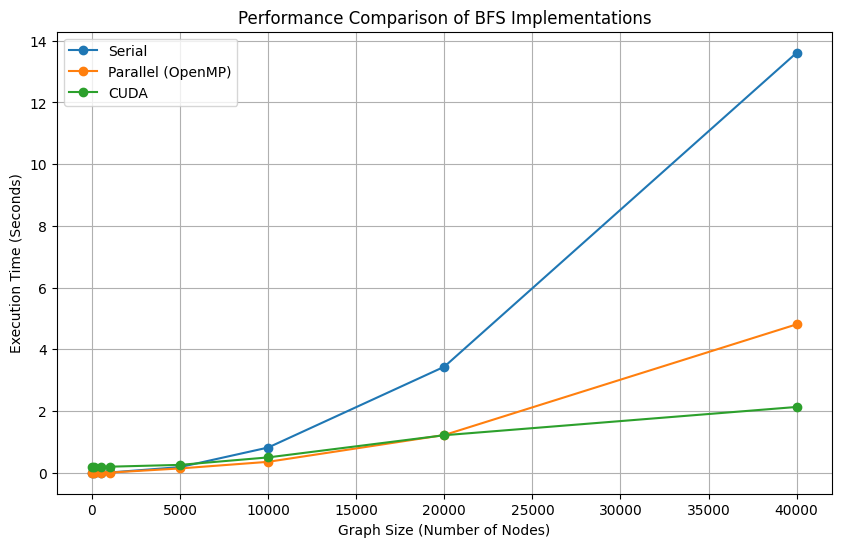

,Data 1 (10 nodes),Data 2 (100 nodes),Data 3 (500 nodes),Data 4 (1000 nodes),Data 5 (5000 nodes),Data 6 (10000 nodes),Data 7 (20000 nodes),Data 8 (40000 nodes)
Serial,0.000018,0.000098,0.001795,0.007229,0.181946,0.816216,3.435913,13.611577
Parallel (OpenMP),0.002191,0.001284,0.001796,0.004242,0.138823,0.353262,1.221954,4.809416
CUDA,0.188841,0.186778,0.184459,0.195307,0.254476,0.496492,1.215371,2.131543


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from run.txt
data = {
    "Graph Size": [10, 100, 500, 1000, 5000, 10000, 20000, 40000],
    "Serial": [0.000018, 0.000098, 0.001795, 0.007229, 0.181946, 0.816216, 3.435913, 13.611577],
    "Parallel (OpenMP)": [0.002191, 0.001284, 0.001796, 0.004242, 0.138823, 0.353262, 1.221954, 4.809416],
    "CUDA": [0.188841, 0.186778, 0.184459, 0.195307, 0.254476, 0.496492, 1.215371, 2.131543]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
for method in ["Serial", "Parallel (OpenMP)", "CUDA"]:
    plt.plot(df["Graph Size"], df[method], marker='o', label=method)

plt.xlabel('Graph Size (Number of Nodes)')
plt.ylabel('Execution Time (Seconds)')
plt.title('Performance Comparison of BFS Implementations')
plt.legend()
plt.grid(True)
plt.show()

# Creating a table for the requested format
table_format = df.set_index('Graph Size').T
table_format.columns = [f'Data {i+1} ({size} nodes)' for i, size in enumerate(df["Graph Size"])]
table_format



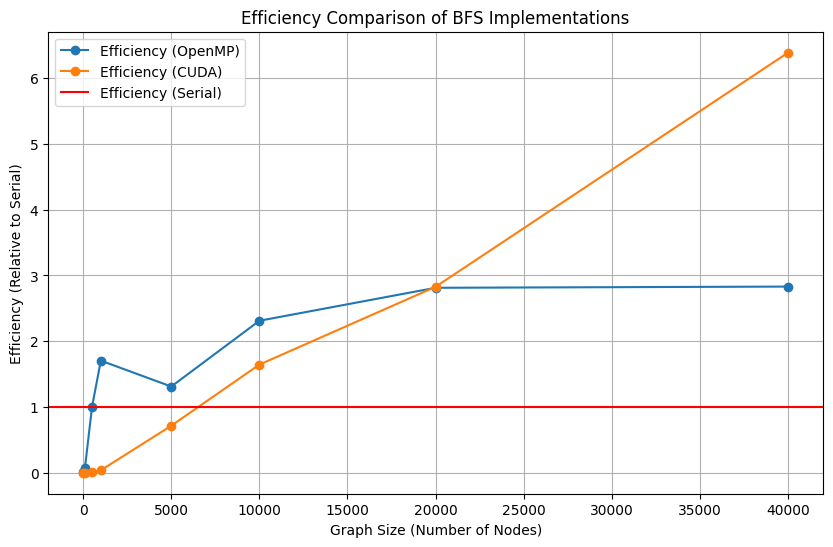

,Graph Size,Efficiency (OpenMP),Efficiency (CUDA)
0,10,0.008215,0.000095
1,100,0.076324,0.000525
2,500,0.999443,0.009731
3,1000,1.704149,0.037014
4,5000,1.310633,0.714983
5,10000,2.310512,1.643966
6,20000,2.811819,2.827049
7,40000,2.830193,6.385786


In [5]:

df["Efficiency (OpenMP)"] = df["Serial"] / df["Parallel (OpenMP)"]
df["Efficiency (CUDA)"] = df["Serial"] / df["CUDA"]

# Plotting efficiency
plt.figure(figsize=(10, 6))


plt.plot(df["Graph Size"], df["Efficiency (OpenMP)"], marker='o', label='Efficiency (OpenMP)')
plt.plot(df["Graph Size"], df["Efficiency (CUDA)"], marker='o', label='Efficiency (CUDA)')
plt.axhline(y=1, color='r', linestyle='-', label='Efficiency (Serial)')
plt.xlabel('Graph Size (Number of Nodes)')
plt.ylabel('Efficiency (Relative to Serial)')
plt.title('Efficiency Comparison of BFS Implementations')
plt.legend()
plt.grid(True)
plt.show()

df[["Graph Size", "Efficiency (OpenMP)", "Efficiency (CUDA)"]]

